In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = "https://raw.githubusercontent.com/Mondol007/Datasets/main/Breast_cancer_data.csv"
dataset = pd.read_csv(path)
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
dataset.shape

(569, 6)

<Axes: >

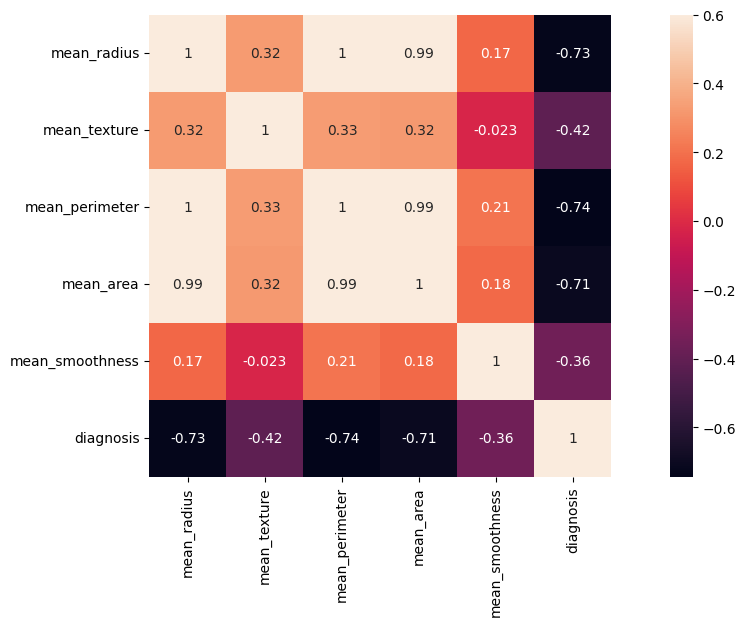

In [ ]:
#Correlation Matrix
from google.colab import files

plt.figure(figsize=(15,6))
sns.heatmap(dataset.corr(), vmax=0.6, square=True, annot=True)


In [ ]:
#basic knn block
from scipy.stats import mode
def eucledian(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist
def predict(x_train, y_train , x_test, k):
  p_labels = []
  for item in x_test:
    point_dist = []
    for j in range(len(x_train)):
      d = eucledian(np.array(x_train[j,:]) , item)
      point_dist.append(d)
    point_dist = np.array(point_dist)
    #print(point_dist)
    dist = np.argsort(point_dist)[:k]
    #print(dist)
    labels = y_train[dist]
    lab = mode(labels)
    lab = lab.mode
    p_labels.append(lab)
    #print(p_labels)
  return p_labels

Analysis:

In [ ]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
#For dropping 'mean_perimeter' & 'mean_area'

dataset = dataset.drop(['mean_perimeter', 'mean_area'], axis=1)

In [ ]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
train, test = train_test_split(dataset, test_size=.2, random_state=41)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 3)
(455,)
(114, 3)
(114,)


In [ ]:
#prediction
Y_pred = predict(X_train, Y_train, X_test, 5)

In [ ]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9035087719298246

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, Y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.91      0.95      0.93        74

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



Confusion Matrix in Numbers
[[33  7]
 [ 4 70]]

Confusion Matrix in Percentage
[[0.825      0.175     ]
 [0.05405405 0.94594595]]



<Axes: >

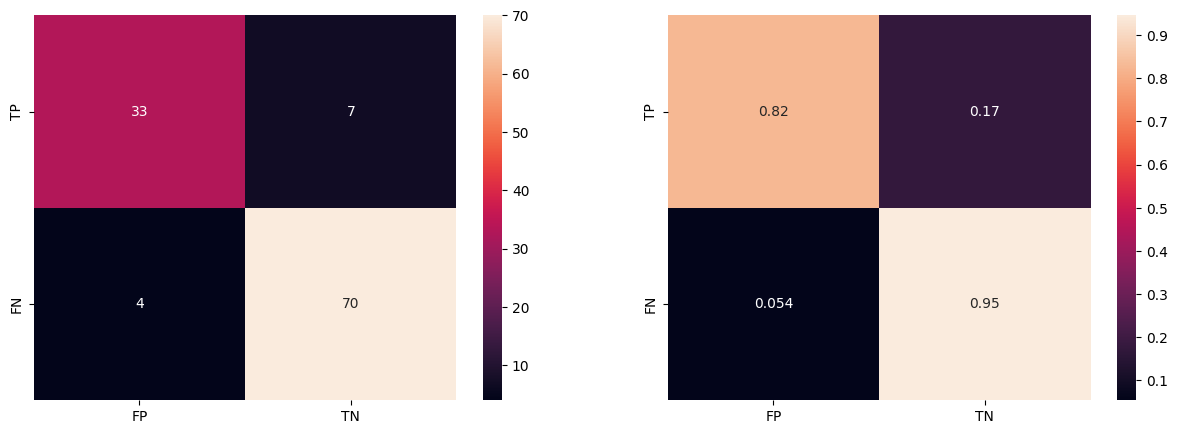

In [ ]:
import seaborn as sns
print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)
df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

After dataset balance:

In [ ]:
X = dataset.drop(['diagnosis'], axis=1)
y = dataset[['diagnosis']]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print("Original", y['diagnosis'].value_counts())
print("Oversampled", y_resampled['diagnosis'].value_counts())

Original 1    357
0    212
Name: diagnosis, dtype: int64
Oversampled 0    357
1    357
Name: diagnosis, dtype: int64


In [ ]:
new_dataset = pd.concat([x_resampled, y_resampled], axis=1)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
train, test = train_test_split(new_dataset, test_size=.2, random_state=41)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(571, 3)
(571,)
(143, 3)
(143,)


In [ ]:
Y_pred = predict(X_train, Y_train, X_test, 5)

In [ ]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.8811188811188811

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, Y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.92      0.82      0.87        68

    accuracy                           0.88       143
   macro avg       0.89      0.88      0.88       143
weighted avg       0.88      0.88      0.88       143



Confusion Matrix in Numbers
[[70  5]
 [12 56]]

Confusion Matrix in Percentage
[[0.93333333 0.06666667]
 [0.17647059 0.82352941]]



<Axes: >

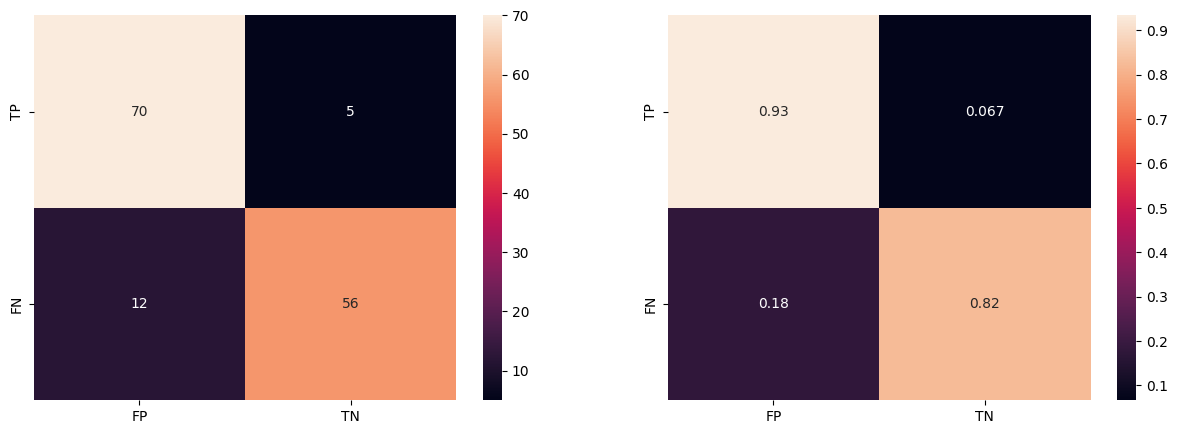

In [ ]:
import seaborn as sns
print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)
df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)